In [2]:
# Setting up inputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Imports neccessary for ODE setup
from scipy.integrate import odeint
from scipy.optimize import least_squares
from numpy.linalg import inv

In [3]:
# Taking tofwerk data and plotting it over time (WITH sample) - Normalized to H3O+ and backgrounded

# load the data
data = pd.read_csv('Raw_Mx_data.csv') # data from tofwerk with sample
bg = pd.read_csv('background_Mx_data_HR.csv') # background data from tofwerk
time_df = pd.read_csv('all_tseries.csv')

time = pd.to_datetime(time_df.iloc[:, 0]) # Convert time series to datetime format, make sure arrays are the same length

# Ensure all dataframes are the same length
min_len = min(len(time), len(data), len(bg)) # Ensure all arrays are the same length
n = min(len(data), len(bg), len(time))
data_aligned = data.iloc[:n].reset_index(drop=True)
bg_aligned = bg.iloc[:n].reset_index(drop=True)
time_aligned = time[:min_len]

# Normalize data and background to H3O+
h3o_col = '19.0178413391|H3O+' # Identify H3O+ column

normalizing_data = data_aligned[h3o_col] # Select H3O+ column for normalization
normalized_data = data_aligned.div(normalizing_data, axis=0) # Normalize all columns by H3O+

normalizing_bg = bg_aligned[h3o_col] # Select H3O+ column for normalization
normalized_bg = bg_aligned.div(normalizing_bg, axis=0) # Normalize all columns by H3O+

# Background subtract to get normalized and corrected data
corrected = normalized_data - normalized_bg

print(corrected.head(20)) # Print first few rows of corrected data

#Selecting specific columns based on highest signal for CxHyOz and CxHy compounds
selected_columns_O = ['61.0284042358|C2H5O2+', '73.0284042358|C3H5O2+','95.0491409302|C6H7O+', '101.0597076416|C5H9O2+']  # Columns for CxHyOz compounds with highest signal
selected_columns_H = ['57.0704231262|C4H9', '65.0391235352|C5H5', '71.0860748291|C5H11', '91.0542297363|C7H7+', '92.0620498657|C7H8+'] # Columns for CxHy compounds with highest signal

normalized_O = corrected[selected_columns_O] # Filter total data set by specific CxHyOz compounds
normalized_H = corrected[selected_columns_H] # Filter total data set by specific CxHy compounds 

normalized_O.index = time_aligned # Set index to time_aligned
normalized_H.index = time_aligned # Set index to time_aligned

    0.0000|Sum_HR  19.0178413391|H3O+  29.0385761261|C2H5+  \
0    42814.384778                 0.0             0.002091   
1    29286.474492                 0.0             0.008078   
2    21451.212842                 0.0            -0.008560   
3    21688.073694                 0.0             0.003425   
4    16200.531937                 0.0             0.017977   
5     9962.139243                 0.0            -0.019440   
6    40903.208165                 0.0            -0.008489   
7    16599.176714                 0.0            -0.005586   
8    19821.220180                 0.0            -0.000287   
9    23785.571344                 0.0             0.011983   
10   22512.403673                 0.0            -0.004786   
11   39928.137122                 0.0            -0.011642   
12   35057.083351                 0.0            -0.000768   
13   36871.241961                 0.0            -0.014543   
14   17754.279154                 0.0             0.005488   
15   447

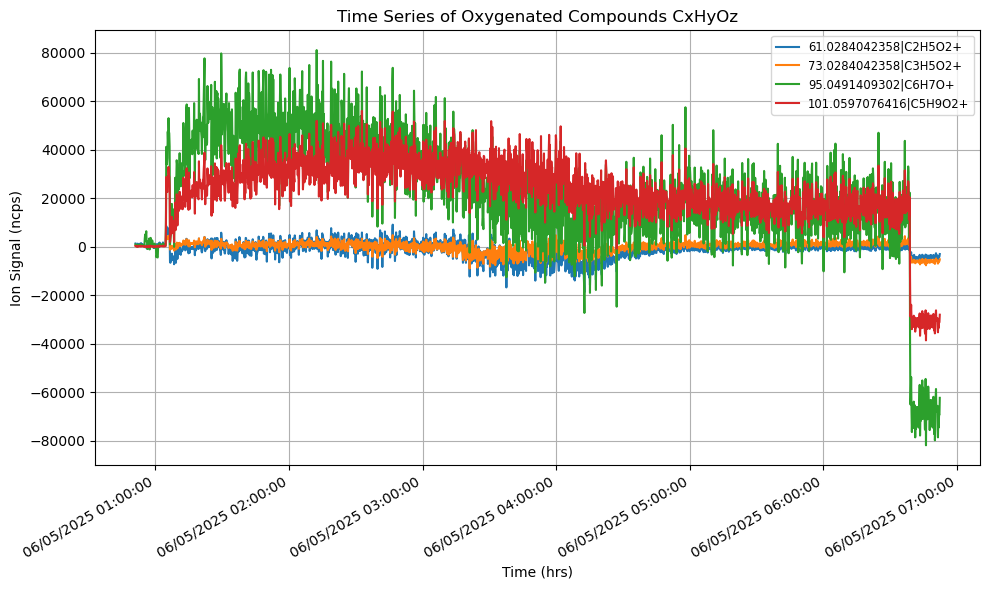

In [4]:
# Plotting CxHyOz Data (Normalized to H3O+ and backgrounded)
plt.figure(figsize=(10, 6)) 
for col in normalized_O.columns:  # Loop through each column in the normalized_O DataFrame
    plt.plot(normalized_O.index, normalized_O[col], label=col)

# Format x-axis ticks to match original format: MM/DD/YYYY HH:MM:SS
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()


plt.title('Time Series of Oxygenated Compounds CxHyOz')
plt.xlabel('Time (hrs)')
plt.ylabel('Ion Signal (ncps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

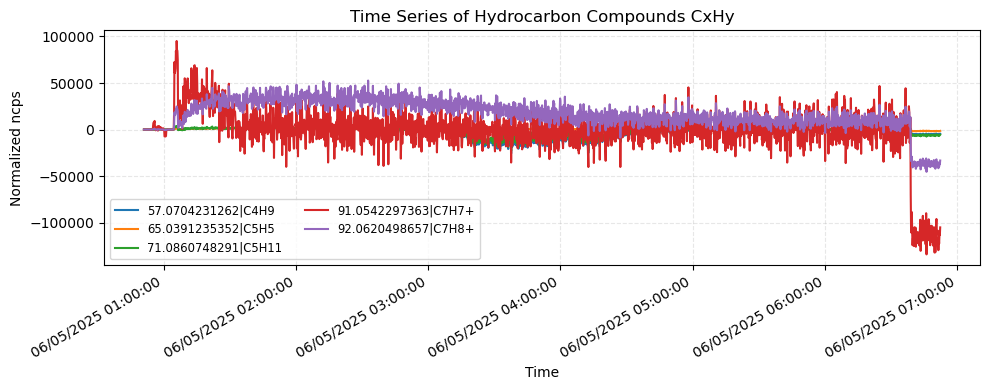

In [5]:
# Plotting CxHy Data (Normalized to H3O+ and backgrounded)
plt.figure(figsize=(10, 4))
for col in normalized_H.columns:  # Loop through each column in the normalized_H DataFrame
    plt.plot(normalized_H.index, normalized_H[col], label=col, linewidth=1.5)

# Format x-axis ticks to match original format: MM/DD/YYYY HH:MM:SS
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

plt.title('Time Series of Hydrocarbon Compounds CxHy')
plt.xlabel('Time')
plt.ylabel('Normalized ncps')
plt.legend(fontsize='small', ncol=2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
#Looking at the data in the specified time range for kinetic Analysis

# Identify range for t(0) and steady state analysis
start_time = pd.to_datetime('2025-06-05 01:06:24.1')
end_time = pd.to_datetime('2025-06-05 02:30:56')

# Filter the data for the specified time range
filter = (normalized_O.index >= start_time) & (normalized_O.index <= end_time)
data_O_range = normalized_O[filter]
data_H_range = normalized_H[filter]



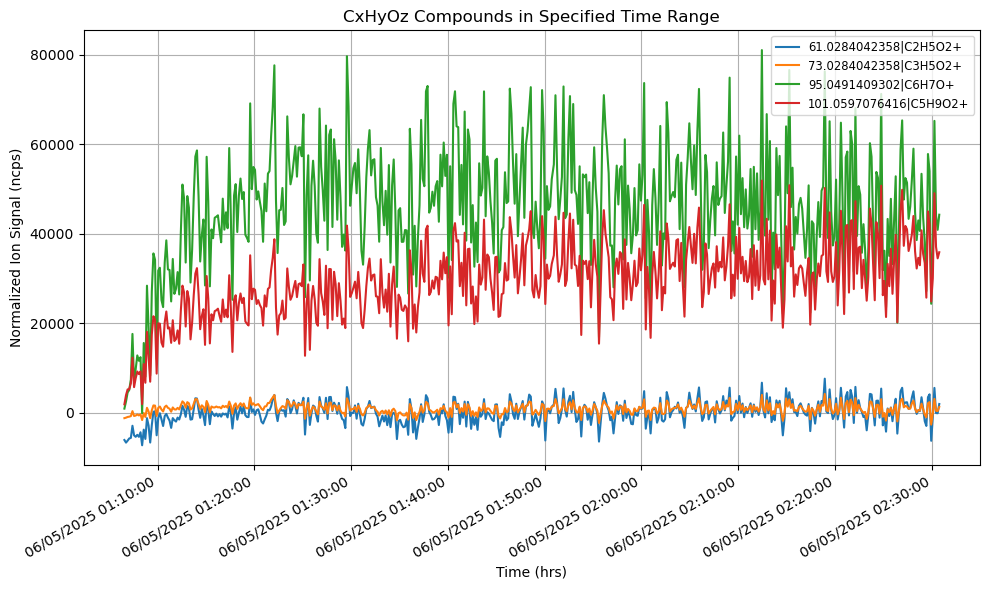

In [7]:
# Plot for CxHyOz compounds in the specified time range for kinetic analysis
plt.figure(figsize=(10, 6))
for col in data_O_range.columns:
    plt.plot(data_O_range.index, data_O_range[col], label=col)

# Format x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

plt.title('CxHyOz Compounds in Specified Time Range')
plt.xlabel('Time (hrs)')
plt.ylabel('Normalized Ion Signal (ncps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

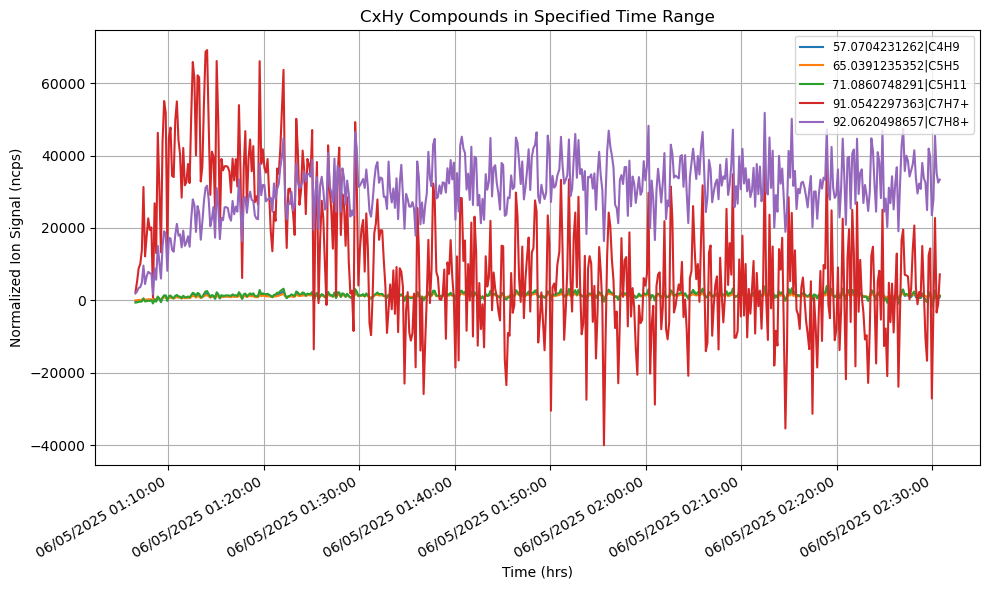

In [8]:
# Plot for CxHy compounds in the specified time range for kinetic analysis
plt.figure(figsize=(10, 6))
for col in data_H_range.columns:
    plt.plot(data_H_range.index, data_H_range[col], label=col)

# Format x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

plt.title('CxHy Compounds in Specified Time Range')
plt.xlabel('Time (hrs)')
plt.ylabel('Normalized Ion Signal (ncps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Lets do some kinetics - Define variables

#'A' = VOC you are studying above
A = '95.0491409302|C6H7O+' # Do this with cal gas (with sample)
Ag = data_O_range[A]  # Select the column for compound A from the filtered data (with sample)
Ag2 = data_O_range_ns[Ag] # KNOWN concentration of compound A as sampled by the vocus at a given time, gas phase (without sample), UNIT =


# Time 0 assumption to get ksup (with sample)
time_0_assumption = Ag.iloc[:3] # Get the values for the first 3 time steps from the filtered time series
time = time_0_assumption.index # Calculate time differences in seconds for the first 3 time steps
dt = (time[1:] - time[:-1]).total_seconds()  # array of time differences
dAg_dt = time_0_assumption.diff().iloc[1:] / dt  # # Calculate dAg/dt for the first 3 time steps
integrated_dAg_dt = np.trapz(dAg_dt, x=time[1:].astype('int64')/1e9)  # Integrate dAg/dt over the first 2 intervals (from t0 to t2) using the trapezoidal rule
print('Integrated dAg/dt from t0 to t2:', integrated_dAg_dt)    


# Time 0 assumption to get Kwdown (without sample)
time_0_assumption_ns = Ag2.iloc[:3] # Get the values for the first 3 time steps from the filtered time series
time = time_0_assumption_ns.index # Calculate time differences in seconds for the first 3 time steps
dt = (time[1:] - time[:-1]).total_seconds()  # array of time differences
dAg2_dt_0 = time_0_assumption_ns.diff().iloc[1:] / dt  # # Calculate dAg/dt for the first 3 time steps
integrated_dAg2_dt_0 = np.trapz(dAg2_dt_0, x=time[1:].astype('int64')/1e9)  # Integrate dAg2/dt over the first 2 intervals (from t0 to t2) using the trapezoidal rule
print('Integrated dAg2/dt from t0 to t2:', integrated_dAg2_dt_0)

# Steady State assumption of Ag with sample
start = pd.to_datetime('2025-06-05 01:40:00.') # Start time for steady state assumption
end = pd.to_datetime('2025-06-05 02:10:00') # End time for steady state assumption

Ag_ss = Ag[(Ag.index >= start) & (Ag.index <= end)] # Filter Ag for the specific time range
dAg_dt_ss = 0

# Steady State assumption of Ag2 without sample
Ag2_ss = Ag2[(Ag2.index >= start) & (Ag2.index <= end)] # Filter Ag2 for the specific time range
dAg2_dt_ss = 0

# Define variables (chamber WITHOUT sample)
V = 5361 # KNOWN Volume of canister, UNIT = L
SA2 = 41.3 # KNOWN Surface area of the cannister, UNIT = cm
C2 = time_0_assumption_ns.iloc[:3] # KNOWN Initial concentration of A at time 0, UNIT =
kdil = (400) / (V * 60) # rate of dilution, known from flow rate, UNIT = s-
kdilAg2 = kdil* Ag2 #rate and concentration of dilution of compound A, UNIT = s-
kwdownAg2 = integrated_dAg2_dt_0 / SA2 # Time zero assumption of d[Ag2]/dt, Ag2 concentration at time 0 = the total concentration and rate of A absorbing to the walls divided by the SA of the walls , UNIT =
kwdown = kwdownAg2 / Ag2 #rate of compound A absorbing to walls, UNIT = 

# Steady State assumption of d[Ag2]/dt allows us to solve for kwupAw, WITHOUT sample UNIT =
kdown_Ag2_ss = kwdownAg2[(kwdownAg2.index >= start) & (kwdownAg2.index <= end)]
kdil_Ag2_ss = kdilAg2[(kdilAg2.index >= start) & (kdilAg2.index <= end)]
time_seconds = (Ag2_ss.index - Ag2_ss.index[0]).total_seconds()
kwdown_Ag2_integral = np.trapz(kwdownAg2, x=time_seconds) # Integrate each term over the time range
kdil_Ag2_integral = np.trapz(kdilAg2, x=time_seconds)
kwupAw_integral = kwdown_Ag2_integral + kdil_Ag2_integral # Steady State assumption of d[Ag2]/dt allows us to solve for kwupAw, UNIT =

Aw = C2 - Ag2_ss # Concentration of A on the walls, UNIT = 
kwup = kwupAw_integral/Aw # Rate of compound A emitting from the walls, UNIT = s-


# Define variables (chamber WITH sample)
S = 10.2 # KNOWN SA of sample, UNIT = cm
SA = SA2 - S # KNOWN surface area of the cannister - sample
Ag = data_O_range[A] # KNOWN concentration of compound A as sampled by the vocus, gas phase, UNIT = molecules/cm**3
C = time_0_assumption # Time zero assumption of d[As]/dt, Ag concentration at time 0 = the total concentration of compound A from the sample, UNIT = molecules/cm**3
kdilAg = kdil * Ag # rate and concentration of dilution of compound A, UNIT = s-
kwdownAg = (kwdown * Ag * SA2) / SA # rate and concentration of absorption to the walls divided by all of the wall, unit =
ksupAs = integrated_dAg_dt # Time zero assumption of d[Ag]/dt concentration and rate of compound A emitting from the sample, UNIT =


# Steady state assumption of d[Ag]/dt allows us to solve for ksdown WITH sample, unit = 
kdown_Ag_ss = kwdownAg[(kwdownAg.index >= start) & (kwdownAg.index <= end)]
kdil_Ag_ss = kdilAg[(kdilAg.index >= start) & (kdilAg.index <= end)]
time_seconds = (Ag_ss.index - Ag_ss.index[0]).total_seconds()
kwdown_Ag_integral = np.trapz(kwdownAg, x=time_seconds) # Integrate each term over the time range
kdil_Ag_integral = np.trapz(kdilAg, x=time_seconds)
ksdown_integral = kwdown_Ag_integral + kdil_Ag_integral # Steady State assumption of d[Ag2]/dt allows us to solve for kwupAw, UNIT =
ksdown = ksdown_integral / Ag # Rate of compound A absorption by sample, UNIT = s-

As = C - Ag - Aw # Concentration of compound A on the sample at a given time, UNIT = molecules/cm**3
ksup = ksupAs/As #4, rate for sample emission of compound A, UNIT = s-


NameError: name 'data_O_range_ns' is not defined

In [ ]:
# TEST Taking tofwerk data and plotting it over time (WITH sample) - Not-Normalized

# Load the data
not_backgrounded_data = pd.read_csv('Raw_Mx_data.csv')
background_data = pd.read_csv('background_Mx_data_HR.csv')
data_time_series = pd.read_csv('all_tseries.csv')

# Background subtracted data
data = not_backgrounded_data - background_data

#Selecting specific columns based on highest signal for CxHyOz and CxHy compounds
selected_columns_O = ['61.0284042358|C2H5O2+', '73.0284042358|C3H5O2+','95.0491409302|C6H7O+', '101.0597076416|C5H9O2+']  # Columns for CxHyOz compounds with highest signal
selected_columns_H = ['57.0704231262|C4H9', '65.0391235352|C5H5', '71.0860748291|C5H11', '91.0542297363|C7H7+', '92.0620498657|C7H8+'] # Columns for CxHy compounds with highest signal

# Filter data
data_O = data[selected_columns_O] # Filter total data set by specific CxHyOz compounds
data_H = data[selected_columns_H] # Filter total data set by specific CxHy compounds  

# Convert time series to datetime format, make sure arrays are the same length
time = pd.to_datetime(data_time_series.iloc[:, 0])

min_len = min(len(time), len(data_O)) # Ensure all arrays are the same length
time_aligned = time[:min_len]
data_O_aligned = data_O.iloc[:min_len, :]
data_H_aligned = data_H.iloc[:min_len, :]

# Don't worry aout this
# '19.0178413391|H3O+', 
# '37.0289535522|H5O2', 

# Plot non-normalized data for CxHyOz compounds
plt.figure(figsize=(10, 6)) 
for col in data_O_aligned.columns: # Loop through each column in the data_O_aligned DataFrame
    plt.plot(time_aligned, data_O_aligned[col], label=col)

# Adjust x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

plt.title('Time Series of Oxygenated Compounds - Not Normalized to H3O')
plt.xlabel('Time (hrs)')
plt.ylabel('Ion Signal (cps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot non-normalized data for CxHy compounds
plt.figure(figsize=(10, 6)) 
for col in data_H_aligned.columns: # Loop through each column in the data_O_aligned DataFrame
    plt.plot(time_aligned, data_H_aligned[col], label=col)

# Adjust x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

plt.title('Time Series of Hydrocarbon Compounds - Not Normalized to H3O')
plt.xlabel('Time (hrs)')
plt.ylabel('Ion Signal (cps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# TEST Taking tofwerk data and plotting it over time (WITH sample) - Normalized to H3O+, NOT background corrected

# Load the data
data = pd.read_csv('Raw_Mx_data.csv') # data from tofwerk with sample
bg = pd.read_csv('background_Mx_data_HR.csv') # background data from tofwerk
time_df = pd.read_csv('all_tseries.csv')

time = pd.to_datetime(time_df.iloc[:, 0]) # Convert time series to datetime format, make sure arrays are the same length

# Ensure all dataframes are the same length
min_len = min(len(time), len(data_O)) # Ensure all arrays are the same length
n = min(len(data), len(bg), len(time))
data_aligned = data.iloc[:n].reset_index(drop=True)
bg_aligned = bg.iloc[:n].reset_index(drop=True)
time_aligned = time[:min_len]

# Normalize data to H3O+ without background correction
h3o = '19.0178413391|H3O+' # Identify H3O+ column

data_aligned = data_aligned.replace([np.inf, -np.inf], np.nan) # Replace NaNs with np.nan
bg_aligned = bg_aligned.replace([np.inf, -np.inf], np.nan) # Replace NaNs with np.nan

normalizer_data = data_aligned[h3o] # Select H3O+ column
normalizer_bg = bg_aligned[h3o] # Select H3O+ column for background

normalized_data = data_aligned.div(normalizer_data, axis=0) # Normalize all columns by H3O+
normalized_bg = bg_aligned.div(normalizer_bg, axis=0) # Normalize all columns by H3O+ for background

# Selecting specific columns based on highest signal for CxHyOz and CxHy compounds
selected_columns_O = ['61.0284042358|C2H5O2+', '73.0284042358|C3H5O2+','95.0491409302|C6H7O+', '101.0597076416|C5H9O2+']  # Columns for CxHyOz compounds with highest signal
selected_columns_H = ['57.0704231262|C4H9', '65.0391235352|C5H5', '71.0860748291|C5H11', '91.0542297363|C7H7+', '92.0620498657|C7H8+'] # Columns for CxHy compounds with highest signal

normalized_O_data = normalized_data[selected_columns_O] # Filter total data set by specific CxHyOz compounds
normalized_H_data = normalized_data[selected_columns_H] # Filter total data set by specific CxHy compounds

normalized_O_bg = normalized_bg[selected_columns_O] # Filter total data set by specific CxHyOz compounds for background
normalized_H_bg = normalized_bg[selected_columns_H] # Filter total data set by specific CxHy compounds for background

normalized_O_data.index = time_aligned # Set index to time_aligned
normalized_H_data.index = time_aligned 
normalized_O_bg.index = time_aligned 
normalized_H_bg.index = time_aligned

# TEST Plotting CxHyOz Data (Normalized to H3O+ without Background Correction)
plt.figure(figsize=(10, 6))
for col in normalized_O_data.columns:  # Loop through each column in the normalized_O_data DataFrame
    plt.plot(normalized_O_data.index, normalized_O_data[col], label=col)
# Format x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()  
plt.title('Raw Data Time Series of Oxygenated Compounds CxHyOz (Normalized to H3O+ without Background Correction)')
plt.xlabel('Time (hrs)')
plt.ylabel('Normalized Ion Signal (ncps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting CxHyOz Data (Normalized to H3O+ background data)
plt.figure(figsize=(10, 6))
for col in normalized_O_bg.columns:  # Loop through each column in the normalized_O_bg DataFrame
    plt.plot(normalized_O_bg.index, normalized_O_bg[col], label=col)
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Background Time Series of Oxygenated Compounds CxHyOz (Normalized to H3O+)')
plt.xlabel('Time (hrs)')
plt.ylabel('Normalized Ion Signal (ncps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()



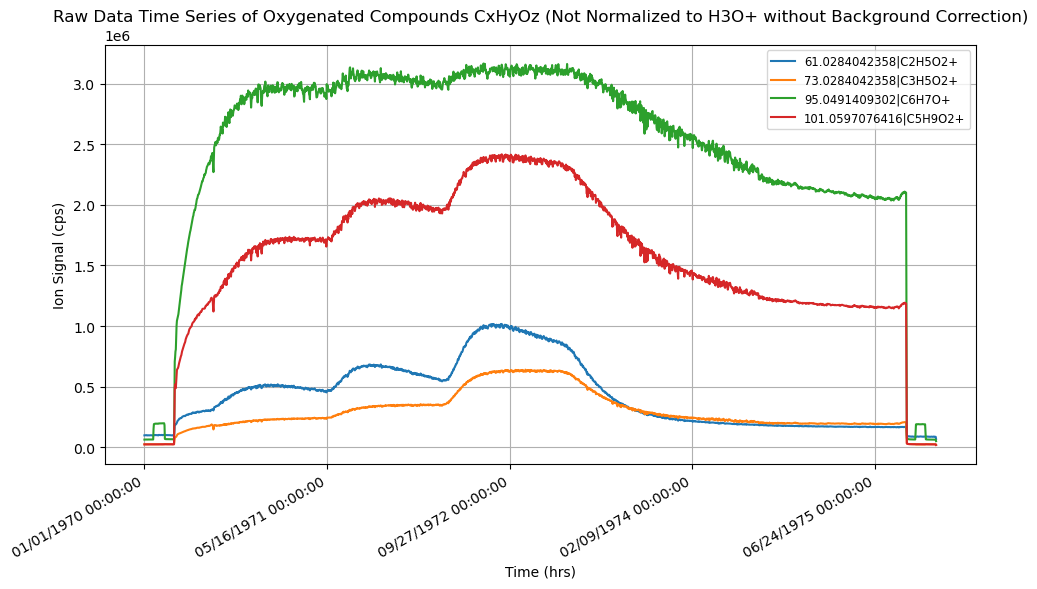

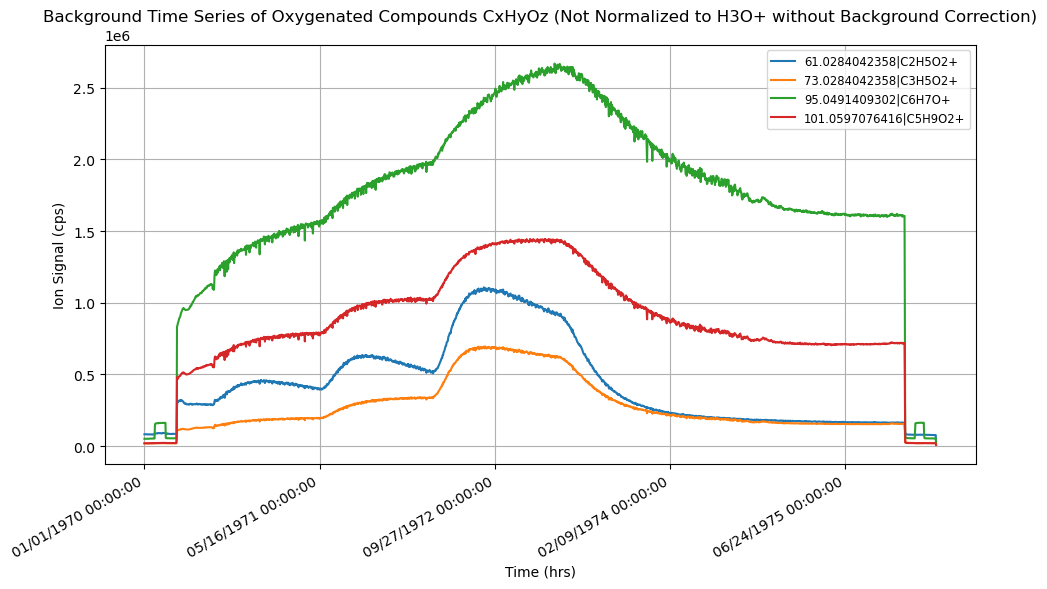

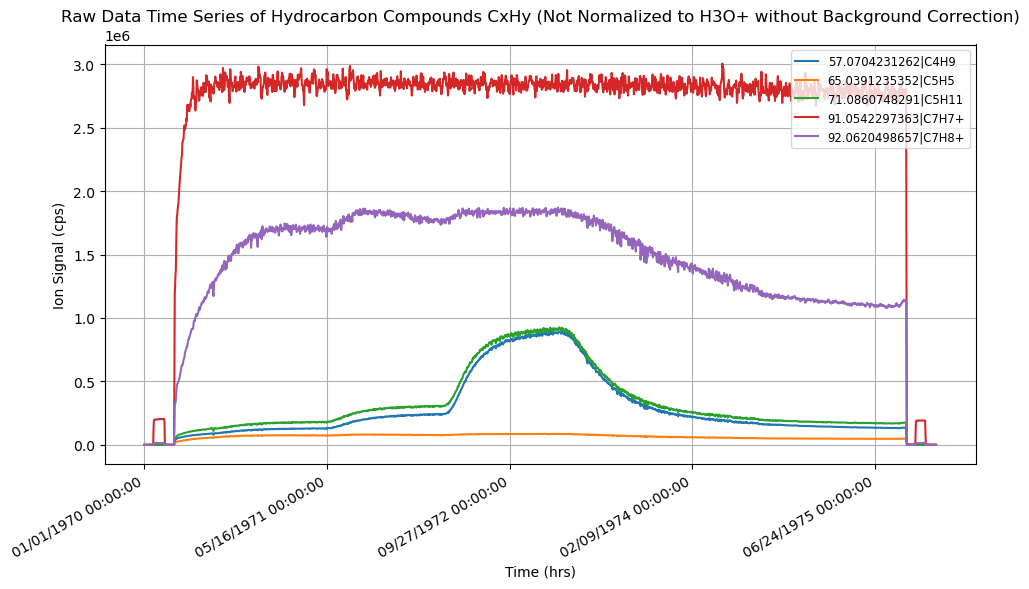

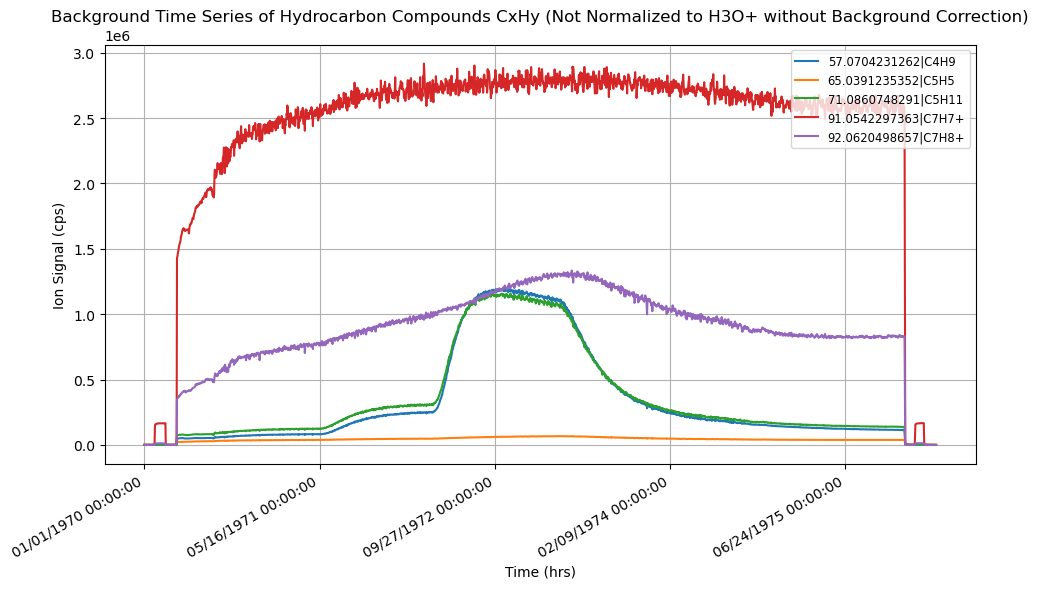

In [ ]:
# TEST Taking tofwerk data and plotting it over time (WITH sample) - NOT Normalized to H3O+, NOT background corrected

# Load the data
data = pd.read_csv('Raw_Mx_data.csv') # data from tofwerk with sample
bg = pd.read_csv('background_Mx_data_HR.csv') # background data from tofwerk
time_df = pd.read_csv('all_tseries.csv')

time = pd.to_datetime(time_df.iloc[:, 0]) # Convert time series to datetime format, make sure arrays are the same length

# Ensure all dataframes are the same length
min_len = min(len(time), len(data), len(bg)) # Ensure all arrays are the same length
n = min(len(data), len(bg), len(time))
data_aligned = data.iloc[:n].reset_index(drop=True)
bg_aligned = bg.iloc[:n].reset_index(drop=True)
time_aligned = time[:min_len]

# Selecting specific columns based on highest signal for CxHyOz and CxHy compounds
selected_columns_O = ['61.0284042358|C2H5O2+', '73.0284042358|C3H5O2+','95.0491409302|C6H7O+', '101.0597076416|C5H9O2+']  # Columns for CxHyOz compounds with highest signal
selected_columns_H = ['57.0704231262|C4H9', '65.0391235352|C5H5', '71.0860748291|C5H11', '91.0542297363|C7H7+', '92.0620498657|C7H8+'] # Columns for CxHy compounds with highest signal

O_data = data[selected_columns_O] # Filter total data set by specific CxHyOz compounds
H_data = data[selected_columns_H] # Filter total data set by specific CxHy compounds

O_bg = bg[selected_columns_O] # Filter total data set by specific CxHyOz compounds for background
H_bg = bg[selected_columns_H] # Filter total data set by specific CxHy compounds for background


# Plotting CxHyOz Data (Normalized to H3O+ NOT background corrected)
plt.figure(figsize=(10, 6))
for col in O_data.columns:  # Loop through each column in the normalized_O_data DataFrame
    plt.plot(O_data.index, O_data[col], label=col) 
# Format x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Raw Data Time Series of Oxygenated Compounds CxHyOz (Not Normalized to H3O+ without Background Correction)')
plt.xlabel('Time (hrs)')
plt.ylabel('Ion Signal (cps)') 
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting CxHyOz Data (Not Normalized to H3O+ background data)
plt.figure(figsize=(10, 6))
for col in O_bg.columns:  # Loop through each column in the normalized_O_bg DataFrame
    plt.plot(O_bg.index, O_bg[col], label=col)
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Background Time Series of Oxygenated Compounds CxHyOz (Not Normalized to H3O+)')
plt.xlabel('Time (hrs)')
plt.ylabel('Ion Signal (cps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting CxHy Data (Not Normalized to H3O+ NOT background data)
plt.figure(figsize=(10, 6))
for col in H_data.columns:  # Loop through each column in the normalized_H_data DataFrame
    plt.plot(H_data.index, H_data[col], label=col, linewidth=1.5)
# Format x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Raw Data Time Series of Hydrocarbon Compounds CxHy (Not Normalized to H3O+ without Background Correction)')
plt.xlabel('Time (hrs)')
plt.ylabel('Ion Signal (cps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting CxHy Data (Not Normalized to H3O+ background data)
plt.figure(figsize=(10, 6))
for col in H_bg.columns:  # Loop through each column in the normalized_H_bg DataFrame
    plt.plot(H_bg.index, H_bg[col], label=col, linewidth=1.5)
# Format x-axis to match time series .csv
date_format = mdates.DateFormatter('%m/%d/%Y %H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Background Time Series of Hydrocarbon Compounds CxHy (Not Normalized to H3O+')
plt.xlabel('Time (hrs)')
plt.ylabel('Ion Signal (cps)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Calculate the change in concentration of VOC A for the first 5 time steps
# A is defined as '95.0491409302|C6H7O+' in cell 11
voc_A_col = '95.0491409302|C6H7O+'

# Get the values for the first 5 time steps from the filtered time series
a_values = data_O_range[voc_A_col].iloc[:5]

# Calculate the change (delta) between each time step
# This will give you the difference between consecutive time points
concentration_changes = a_values.diff().dropna()

print("VOC A concentrations (first 5 time steps):\n", a_values.values)
print("Change in concentration between time steps:\n", concentration_changes.values)

# Calculate and print the average change in concentration for the first 5 time steps
avg_change = concentration_changes.mean()
print("Average change in concentration (first 5 time steps):", avg_change)

VOC A concentrations (first 5 time steps):
 [ 910.5577542  2497.63272416 4517.80846405 5085.67460393 7386.04915963]
Change in concentration between time steps:
 [1587.07496996 2020.17573989  567.86613988 2300.3745557 ]


Average change in concentration (first 5 time steps): 1618.8728513576189
